# Value-based prediction

In [1]:
import os

import seaborn as sns
from lqsvg.experiment import plot
from lqsvg.experiment.utils import wandb_runs_dataframe
from matplotlib import pyplot as plt

/Users/angelolovatto/Library/Caches/pypoetry/virtualenvs/lqsvg-G_e_Olvw-py3.8/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


## Matplotlib setup

Latex presets ([ref](https://jwalton.info/Embed-Publication-Matplotlib-Latex/))

In [2]:
from functools import partial

plot.create_latex_style()
set_size = partial(plot.latex_size, width="thesis")

In [3]:
print(*plot.available_styles())

Solarize_Light2 _classic_test_patch bmh classic dark_background fast fivethirtyeight ggplot grayscale seaborn seaborn-bright seaborn-colorblind seaborn-dark seaborn-dark-palette seaborn-darkgrid seaborn-deep seaborn-muted seaborn-notebook seaborn-paper seaborn-pastel seaborn-poster seaborn-talk seaborn-ticks seaborn-white seaborn-whitegrid tableau-colorblind10 tex


In [4]:
print(f"Your style sheets are located at: {plot.STYLE_PATH}")

Your style sheets are located at: /Users/angelolovatto/Library/Caches/pypoetry/virtualenvs/lqsvg-G_e_Olvw-py3.8/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib


In [5]:
# Using seaborn's style
# plt.style.use("seaborn")
sns.set()
# With LaTex fonts
plt.style.use("tex")

In [6]:
def figpath(name: str) -> str:
    return os.path.join("images", name + ".pdf")


def savefig(fig, name):
    return plot.save_pdf_tight(fig, figpath(name))

## TD(0)

In [7]:
DATA = wandb_runs_dataframe(
    "angelovtt/ch5",
    configs={"polyak": 0.995},
    tags=["ValueLearning", "9.30.0"],
)
DATA.head()

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


,trainer/global_step,val/grad_acc,val/bootstrap/relative_qval_err,_step,val/action_grad_acc,_runtime,epoch,val/bootstrap/action_grad_acc,val/relative_vval_err,_timestamp,...,summary/train/relative_vval_err,summary/val/bootstrap/relative_qval_err,summary/controllability,summary/val/action_grad_acc,summary/val/grad_acc,summary/train/loss,summary/epoch,summary/test/grad_acc,summary/passive_eigvals,summary/test/relative_vval_err
0,0,0.482922,6.206344,0,0.607343,5,0,0.577971,35.23204,1633021724,...,4.459551,0.903581,True,0.828548,0.655059,19594.078125,39,0.653986,"{'_type': 'histogram', 'bins': [0.928571462631...",5.042147
1,49,NaN,NaN,1,NaN,7,0,NaN,NaN,1633021726,...,4.459551,0.903581,True,0.828548,0.655059,19594.078125,39,0.653986,"{'_type': 'histogram', 'bins': [0.928571462631...",5.042147
2,99,NaN,NaN,2,NaN,9,0,NaN,NaN,1633021728,...,4.459551,0.903581,True,0.828548,0.655059,19594.078125,39,0.653986,"{'_type': 'histogram', 'bins': [0.928571462631...",5.042147
3,149,NaN,NaN,3,NaN,12,0,NaN,NaN,1633021731,...,4.459551,0.903581,True,0.828548,0.655059,19594.078125,39,0.653986,"{'_type': 'histogram', 'bins': [0.928571462631...",5.042147
4,199,NaN,NaN,4,NaN,14,0,NaN,NaN,1633021733,...,4.459551,0.903581,True,0.828548,0.655059,19594.078125,39,0.653986,"{'_type': 'histogram', 'bins': [0.928571462631...",5.042147


In [8]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 63 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   trainer/global_step                        10010 non-null  int64  
 1   val/grad_acc                               1272 non-null   float64
 2   val/bootstrap/relative_qval_err            1272 non-null   float64
 3   _step                                      10010 non-null  int64  
 4   val/action_grad_acc                        1272 non-null   float64
 5   _runtime                                   10010 non-null  int64  
 6   epoch                                      10010 non-null  int64  
 7   val/bootstrap/action_grad_acc              1272 non-null   float64
 8   val/relative_vval_err                      1272 non-null   float64
 9   _timestamp                                 10010 non-null  int64  
 10  train/action_grad_acc 

In [9]:
DATA["exploration"] = DATA["config/exploration/type"]

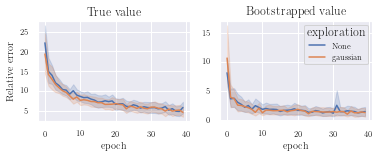

In [10]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharex=True, figsize=set_size(subplots=(1, 2)))
sns.lineplot(
    ax=ax0,
    data=DATA,
    x="epoch",
    y="val/relative_vval_err",
    hue="exploration",
    #     units="config/seed",
    #     estimator=None,
    legend=False,
)
ax0.set_ylabel("Relative error")
ax0.set_title("True value")

sns.lineplot(
    ax=ax1,
    data=DATA,
    x="epoch",
    y="val/bootstrap/relative_qval_err",
    hue="exploration",
    #     units="config/seed",
    #     estimator=None,
)
ax1.set_ylabel(None)
ax1.set_title("Bootstrapped value")

savefig(fig, "value-based_value_errors")

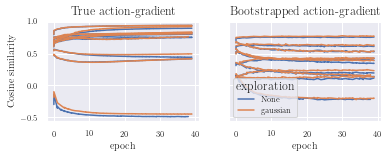

In [11]:
fig, (ax0, ax1) = plt.subplots(
    1, 2, sharex=True, sharey=True, figsize=set_size(subplots=(1, 2))
)

sns.lineplot(
    ax=ax0,
    data=DATA,
    x="epoch",
    y="val/action_grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
    legend=False,
)
ax0.set_ylabel("Cosine similarity")
ax0.set_title("True action-gradient")

sns.lineplot(
    ax=ax1,
    data=DATA,
    x="epoch",
    y="val/bootstrap/action_grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
)
ax1.set_title("Bootstrapped action-gradient")

savefig(fig, "value-based_action-gradient_acc")

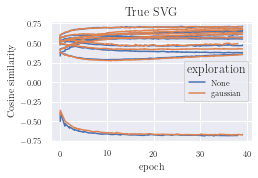

In [12]:
fig, ax = plt.subplots(figsize=set_size(fraction=0.6))

sns.lineplot(
    ax=ax,
    data=DATA,
    x="epoch",
    y="val/grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
)
ax.set_ylabel("Cosine similarity")
ax.set_title("True SVG")

savefig(fig, "value-based_gradient_acc")

## MAGE

In [13]:
MAGE = wandb_runs_dataframe(
    "angelovtt/ch5", configs={"learning_rate": 1e-2}, tags=["MAGEPrediction", "10.3.0"]
)
MAGE.head()

,grad_2.0_norm_qval.q_values.1.linear_step,trainer/global_step,_step,train/action_grad_acc,grad_2.0_norm_qval.q_values.0.quad_step,grad_2.0_norm_total_step,grad_2.0_norm_qval.q_values.0.const_step,_runtime,grad_2.0_norm_qval.q_values.1.quad_step,train/bootstrap/relative_qval_err,...,summary/grad_2.0_norm_qval.q_values.0.const_step,summary/grad_2.0_norm_qval.q_values.0.quad_step,summary/val/bootstrap/action_grad_acc,summary/grad_2.0_norm_qval.q_values.1.linear_step,summary/grad_2.0_norm_qval.q_values.1.const_epoch,summary/grad_2.0_norm_policy.K_step,summary/train/bootstrap/action_grad_acc,summary/train/relative_vval_err,summary/passive_eigvals,summary/epoch
0,2.8614,49,1,0.673754,40.974602,2596.245605,0.4570,8,13.8138,2.481288,...,0.5461,14.1852,0.642671,3.4336,0.727397,201289.875,0.604532,2.111768,"{'_type': 'histogram', 'bins': [0.928571462631...",39
1,1.3232,99,2,0.697737,8.772800,4875.018066,0.3062,12,5.1904,1.784800,...,0.5461,14.1852,0.642671,3.4336,0.727397,201289.875,0.604532,2.111768,"{'_type': 'histogram', 'bins': [0.928571462631...",39
2,1.8116,149,3,0.699114,3.430800,6846.877441,0.1918,16,6.7897,1.644264,...,0.5461,14.1852,0.642671,3.4336,0.727397,201289.875,0.604532,2.111768,"{'_type': 'histogram', 'bins': [0.928571462631...",39
3,1.5101,199,4,0.725107,10.120200,8733.951172,0.2825,20,5.1498,1.289983,...,0.5461,14.1852,0.642671,3.4336,0.727397,201289.875,0.604532,2.111768,"{'_type': 'histogram', 'bins': [0.928571462631...",39
4,1.1482,299,6,0.756019,4.012700,12650.089844,0.2474,27,4.6770,1.433868,...,0.5461,14.1852,0.642671,3.4336,0.727397,201289.875,0.604532,2.111768,"{'_type': 'histogram', 'bins': [0.928571462631...",39


In [14]:
MAGE["exploration"] = MAGE["config/exploration/type"]

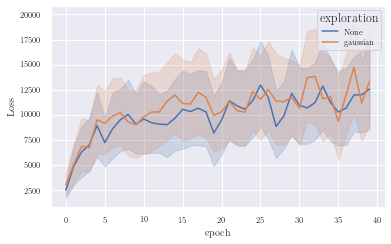

In [15]:
fig, ax = plt.subplots(figsize=set_size())

sns.lineplot(
    ax=ax,
    data=MAGE,
    x="epoch",
    y="train/loss",
    hue="exploration",
)
ax.set_ylabel("Loss")

savefig(fig, "mage_loss")

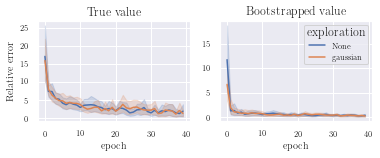

In [16]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharex=True, figsize=set_size(subplots=(1, 2)))

sns.lineplot(
    ax=ax0,
    data=MAGE,
    x="epoch",
    y="val/relative_vval_err",
    hue="exploration",
    legend=False,
)
ax0.set_ylabel("Relative error")
ax0.set_title("True value")

sns.lineplot(
    ax=ax1,
    data=MAGE,
    x="epoch",
    y="val/bootstrap/relative_qval_err",
    hue="exploration",
)
ax1.set_ylabel(None)
ax1.set_title("Bootstrapped value")

savefig(fig, "mage_value_errors")

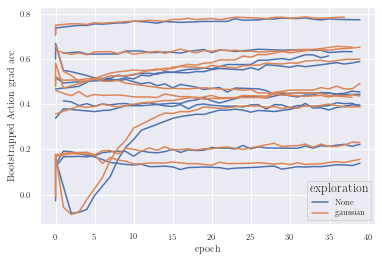

In [17]:
ax = sns.lineplot(
    data=MAGE,
    x="epoch",
    y="val/bootstrap/action_grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
)
ax.set_ylabel("Bootstrapped Action grad acc")
plt.show()

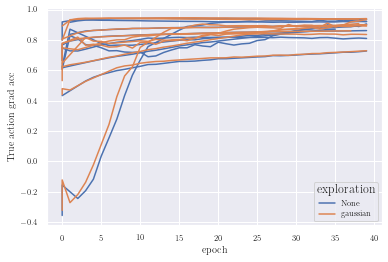

In [18]:
ax = sns.lineplot(
    data=MAGE,
    x="epoch",
    y="val/action_grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
)
ax.set_ylabel("True action grad acc")
plt.show()

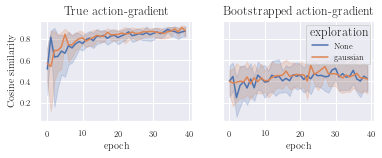

In [19]:
fig, (ax0, ax1) = plt.subplots(
    1, 2, sharex=True, sharey=True, figsize=set_size(subplots=(1, 2))
)

sns.lineplot(
    ax=ax0,
    data=MAGE,
    x="epoch",
    y="val/action_grad_acc",
    hue="exploration",
    legend=False,
)
ax0.set_ylabel("Cosine similarity")
ax0.set_title("True action-gradient")

sns.lineplot(
    ax=ax1,
    data=MAGE,
    x="epoch",
    y="val/bootstrap/action_grad_acc",
    hue="exploration",
)
ax1.set_title("Bootstrapped action-gradient")

savefig(fig, "mage_action-gradient_acc")

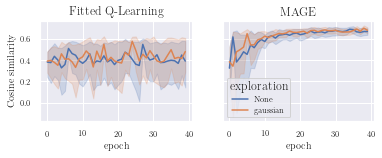

In [20]:
fig, (ax0, ax1) = plt.subplots(
    1, 2, sharex=True, sharey=True, figsize=set_size(subplots=(1, 2))
)

sns.lineplot(
    ax=ax0,
    data=DATA,
    x="epoch",
    y="val/grad_acc",
    hue="exploration",
    legend=False,
)
ax0.set_ylabel("Cosine similarity")
ax0.set_title("Fitted Q-Learning")

sns.lineplot(
    ax=ax1,
    data=MAGE,
    x="epoch",
    y="val/grad_acc",
    hue="exploration",
)
ax1.set_title("MAGE")

savefig(fig, "td_vs_mage_gradient_acc")

# 17/10/21

## TD(0)

In [21]:
DATA = wandb_runs_dataframe(
    "angelovtt/ch5",
    configs={"loss": "TD(1)"},
    tags=["ValueBasedPrediction", "10.17.0"],
)
DATA.head()

,trainer/global_step,val/grad_acc,val/bootstrap/relative_qval_err,_step,val/bootstrap/obs_grad_acc,val/action_grad_acc,val/relative_qval_err,_runtime,val/obs_grad_acc,epoch,...,summary/trainer/global_step,summary/train/relative_vval_err,summary/val/obs_grad_acc,summary/train/bootstrap/action_grad_acc,summary/train/grad_acc,summary/train/bootstrap/obs_grad_acc,summary/epoch,summary/val/grad_acc,summary/test/bootstrap/relative_qval_err,summary/controllability
0,0,0.472702,0.690388,0,0.7149,0.606172,0.954009,4,0.727089,0,...,21120,2.742015,0.92135,0.511592,0.532764,0.623755,29,0.684595,0.351354,True
1,49,NaN,NaN,1,NaN,NaN,NaN,7,NaN,0,...,21120,2.742015,0.92135,0.511592,0.532764,0.623755,29,0.684595,0.351354,True
2,99,NaN,NaN,2,NaN,NaN,NaN,9,NaN,0,...,21120,2.742015,0.92135,0.511592,0.532764,0.623755,29,0.684595,0.351354,True
3,149,NaN,NaN,3,NaN,NaN,NaN,12,NaN,0,...,21120,2.742015,0.92135,0.511592,0.532764,0.623755,29,0.684595,0.351354,True
4,199,NaN,NaN,4,NaN,NaN,NaN,14,NaN,0,...,21120,2.742015,0.92135,0.511592,0.532764,0.623755,29,0.684595,0.351354,True


In [22]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   trainer/global_step                        9680 non-null   int64  
 1   val/grad_acc                               1220 non-null   float64
 2   val/bootstrap/relative_qval_err            1220 non-null   float64
 3   _step                                      9680 non-null   int64  
 4   val/bootstrap/obs_grad_acc                 1220 non-null   float64
 5   val/action_grad_acc                        1220 non-null   float64
 6   val/relative_qval_err                      1220 non-null   float64
 7   _runtime                                   9680 non-null   int64  
 8   val/obs_grad_acc                           1220 non-null   float64
 9   epoch                                      9680 non-null   int64  
 10  val/bootstrap/action_gra

In [23]:
DATA["exploration"] = DATA["config/exploration/type"]

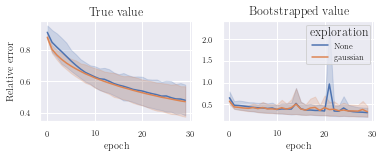

In [24]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharex=True, figsize=set_size(subplots=(1, 2)))
sns.lineplot(
    ax=ax0,
    data=DATA,
    x="epoch",
    y="val/relative_qval_err",
    hue="exploration",
    legend=False,
)
ax0.set_ylabel("Relative error")
ax0.set_title("True value")

sns.lineplot(
    ax=ax1,
    data=DATA,
    x="epoch",
    y="val/bootstrap/relative_qval_err",
    hue="exploration",
)
ax1.set_ylabel(None)
ax1.set_title("Bootstrapped value")

savefig(fig, "value-based_value_errors")

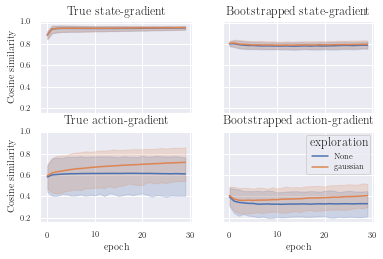

In [25]:
fig, axis = plt.subplots(
    2, 2, sharex=True, sharey=True, figsize=set_size(subplots=(2, 2))
)

sns.lineplot(
    ax=axis[0][0],
    data=DATA,
    x="epoch",
    y="val/obs_grad_acc",
    hue="exploration",
    legend=False,
)
axis[0][0].set_ylabel("Cosine similarity")
axis[0][0].set_title("True state-gradient")

sns.lineplot(
    ax=axis[0][1],
    data=DATA,
    x="epoch",
    y="val/bootstrap/obs_grad_acc",
    hue="exploration",
    legend=False,
)
axis[0][1].set_title("Bootstrapped state-gradient")

sns.lineplot(
    ax=axis[1][0],
    data=DATA,
    x="epoch",
    y="val/action_grad_acc",
    hue="exploration",
    legend=False,
)
axis[1][0].set_ylabel("Cosine similarity")
axis[1][0].set_title("True action-gradient")

sns.lineplot(
    ax=axis[1][1],
    data=DATA,
    x="epoch",
    y="val/bootstrap/action_grad_acc",
    hue="exploration",
)
axis[1][1].set_title("Bootstrapped action-gradient")

savefig(fig, "value-based_decomp_gradient_acc")

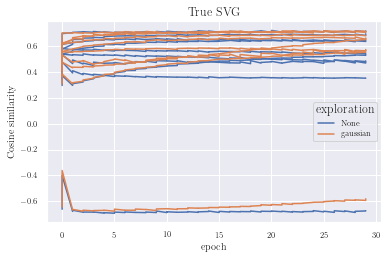

In [26]:
fig, ax = plt.subplots(figsize=set_size())

sns.lineplot(
    ax=ax,
    data=DATA,
    x="epoch",
    y="val/grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
)
ax.set_ylabel("Cosine similarity")
ax.set_title("True SVG")

savefig(fig, "value-based_gradient_acc")

## MAGE

In [27]:
MAGE = wandb_runs_dataframe(
    "angelovtt/ch5", configs={"loss": "MAGE"}, tags=["ValueBasedPrediction", "10.17.0"]
)
MAGE.head()

,trainer/global_step,val/grad_acc,val/bootstrap/relative_qval_err,_step,val/bootstrap/obs_grad_acc,val/action_grad_acc,val/relative_qval_err,_runtime,val/obs_grad_acc,epoch,...,summary/train/bootstrap/obs_grad_acc,summary/train/obs_grad_acc,summary/train/action_grad_acc,summary/train/bootstrap/relative_qval_err,summary/passive_eigvals,summary/test/bootstrap/obs_grad_acc,summary/val/bootstrap/relative_qval_err,summary/train/relative_vval_err,summary/train/relative_qval_err,summary/trainable_parameters
0,0,0.47193,0.677103,0,0.713843,0.606417,0.957596,4,0.722109,0,...,0.760047,0.906843,0.863386,0.329001,"{'_type': 'histogram', 'bins': [0.928571462631...",0.698392,0.362215,2.836669,0.635922,2100
1,49,NaN,NaN,1,NaN,NaN,NaN,8,NaN,0,...,0.760047,0.906843,0.863386,0.329001,"{'_type': 'histogram', 'bins': [0.928571462631...",0.698392,0.362215,2.836669,0.635922,2100
2,99,NaN,NaN,2,NaN,NaN,NaN,11,NaN,0,...,0.760047,0.906843,0.863386,0.329001,"{'_type': 'histogram', 'bins': [0.928571462631...",0.698392,0.362215,2.836669,0.635922,2100
3,149,NaN,NaN,3,NaN,NaN,NaN,14,NaN,0,...,0.760047,0.906843,0.863386,0.329001,"{'_type': 'histogram', 'bins': [0.928571462631...",0.698392,0.362215,2.836669,0.635922,2100
4,199,NaN,NaN,4,NaN,NaN,NaN,17,NaN,0,...,0.760047,0.906843,0.863386,0.329001,"{'_type': 'histogram', 'bins': [0.928571462631...",0.698392,0.362215,2.836669,0.635922,2100


In [28]:
MAGE["exploration"] = MAGE["config/exploration/type"]

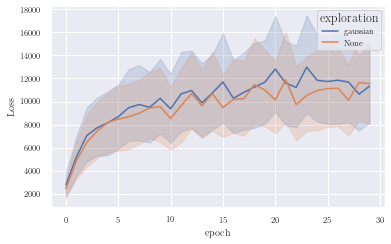

In [29]:
fig, ax = plt.subplots(figsize=set_size())

sns.lineplot(
    ax=ax,
    data=MAGE,
    x="epoch",
    y="train/loss",
    hue="exploration",
)
ax.set_ylabel("Loss")

savefig(fig, "mage_loss")

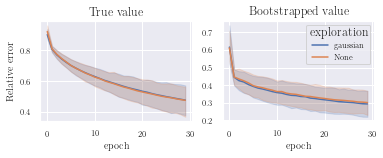

In [30]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharex=True, figsize=set_size(subplots=(1, 2)))
sns.lineplot(
    ax=ax0,
    data=MAGE,
    x="epoch",
    y="val/relative_qval_err",
    hue="exploration",
    legend=False,
)
ax0.set_ylabel("Relative error")
ax0.set_title("True value")

sns.lineplot(
    ax=ax1,
    data=MAGE,
    x="epoch",
    y="val/bootstrap/relative_qval_err",
    hue="exploration",
)
ax1.set_ylabel(None)
ax1.set_title("Bootstrapped value")

savefig(fig, "value-based_value_errors")

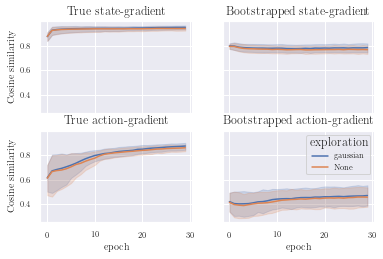

In [31]:
fig, axis = plt.subplots(
    2, 2, sharex=True, sharey=True, figsize=set_size(subplots=(2, 2))
)

sns.lineplot(
    ax=axis[0][0],
    data=MAGE,
    x="epoch",
    y="val/obs_grad_acc",
    hue="exploration",
    legend=False,
)
axis[0][0].set_ylabel("Cosine similarity")
axis[0][0].set_title("True state-gradient")

sns.lineplot(
    ax=axis[0][1],
    data=MAGE,
    x="epoch",
    y="val/bootstrap/obs_grad_acc",
    hue="exploration",
    legend=False,
)
axis[0][1].set_title("Bootstrapped state-gradient")

sns.lineplot(
    ax=axis[1][0],
    data=MAGE,
    x="epoch",
    y="val/action_grad_acc",
    hue="exploration",
    legend=False,
)
axis[1][0].set_ylabel("Cosine similarity")
axis[1][0].set_title("True action-gradient")

sns.lineplot(
    ax=axis[1][1],
    data=MAGE,
    x="epoch",
    y="val/bootstrap/action_grad_acc",
    hue="exploration",
)
axis[1][1].set_title("Bootstrapped action-gradient")

savefig(fig, "value-based_decomp_gradient_acc")

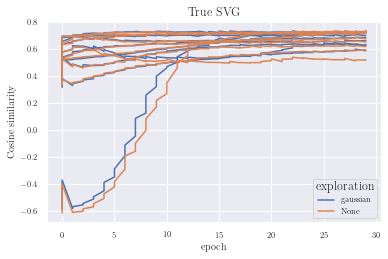

In [32]:
fig, ax = plt.subplots(figsize=set_size())

sns.lineplot(
    ax=ax,
    data=MAGE,
    x="epoch",
    y="val/grad_acc",
    hue="exploration",
    units="config/seed",
    estimator=None,
)
ax.set_ylabel("Cosine similarity")
ax.set_title("True SVG")

savefig(fig, "value-based_gradient_acc")

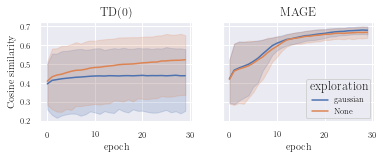

In [33]:
fig, (ax0, ax1) = plt.subplots(
    1, 2, sharex=True, sharey=True, figsize=set_size(subplots=(1, 2))
)

sns.lineplot(
    ax=ax0,
    data=DATA,
    x="epoch",
    y="val/grad_acc",
    hue="exploration",
    legend=False,
)
ax0.set_ylabel("Cosine similarity")
ax0.set_title("TD(0)")

sns.lineplot(
    ax=ax1,
    data=MAGE,
    x="epoch",
    y="val/grad_acc",
    hue="exploration",
)
ax1.set_title("MAGE")

savefig(fig, "td_vs_mage_gradient_acc")